In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Streamlit

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:230%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400;
            text-align: center;"><u><b>Fashion Retail Sales</b></u>
</div>

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>IMPORT NEEDED LIBRARIES</i>
</div>

In [ ]:
import pandas as pd
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import sys
import ast
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [ ]:
# Ignores warnings while execuring dataset
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Printing the directory in which the files exist
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive'):
    print(dirname)

/content/drive/MyDrive/archive


<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>DATASET LOADING</i>
</div>

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/archive/Fashion.csv")
df.head()


,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [ ]:
def satisfaction_score(rating):
    if rating >= 4.0:
        return 'Satisfied'
    elif rating >= 2.5:
        return 'Neutral'
    else:
        return 'Dissatisfied'

# Apply the function to create a new column
df['Satisfaction_Status'] = df['Review Rating'].apply(satisfaction_score)

# Optionally shuffle the DataFrame to demonstrate the change
df = df.sample(frac=1).reset_index(drop=True)

# Add a new column 'state' with alternating values 'a' and 'b'
df['state'] = ['a' if i < len(df) / 2 else 'b' for i in range(len(df))]

# Insert the new column at the beginning of the DataFrame
df.insert(0, 'state', df.pop('state'))

# Display the DataFrame
df.head()


,state,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Satisfaction_Status
0,a,4118,Raincoat,137.0,2023-05-17,3.5,Credit Card,Neutral
1,a,3979,Swimsuit,190.0,2023-09-08,1.9,Cash,Dissatisfied
2,a,4064,Flannel Shirt,128.0,2022-12-01,4.1,Credit Card,Satisfied
3,a,3967,Raincoat,188.0,2023-05-06,3.3,Cash,Neutral
4,a,3985,Loafers,67.0,2023-08-12,3.1,Credit Card,Neutral


In [ ]:
styled_df = df.style.set_table_styles([{'selector': 'th', 'props': [('background', 'lightgrey')]}])
styled_df

,state,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Satisfaction_Status
0,a,4118,Raincoat,137.000000,2023-05-17,3.500000,Credit Card,Neutral
1,a,3979,Swimsuit,190.000000,2023-09-08,1.900000,Cash,Dissatisfied
2,a,4064,Flannel Shirt,128.000000,2022-12-01,4.100000,Credit Card,Satisfied
3,a,3967,Raincoat,188.000000,2023-05-06,3.300000,Cash,Neutral
4,a,3985,Loafers,67.000000,2023-08-12,3.100000,Credit Card,Neutral
5,a,4077,Overalls,197.000000,2023-07-23,3.200000,Credit Card,Neutral
6,a,4108,Leggings,nan,2023-07-26,3.300000,Credit Card,Neutral
7,a,3975,Shorts,105.000000,2022-11-17,nan,Credit Card,Dissatisfied
8,a,4021,Skirt,nan,2023-05-20,3.900000,Cash,Neutral
9,a,4119,Hat,nan,2023-09-22,4.100000,Credit Card,Satisfied


<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>DISPLAY A SAMPLE ...</i>
</div>

In [ ]:
df.sample(3)

,state,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Satisfaction_Status
2722,b,3980,Onesie,93.0,2023-04-27,NaN,Cash,Dissatisfied
985,a,3994,Trousers,182.0,2023-09-10,1.8,Cash,Dissatisfied
1946,b,4033,Tie,185.0,2023-04-08,4.5,Cash,Satisfied


In [ ]:
df.head(3)

,state,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Satisfaction_Status
0,a,4118,Raincoat,137.0,2023-05-17,3.5,Credit Card,Neutral
1,a,3979,Swimsuit,190.0,2023-09-08,1.9,Cash,Dissatisfied
2,a,4064,Flannel Shirt,128.0,2022-12-01,4.1,Credit Card,Satisfied


In [ ]:
df['Item Purchased'].unique()

array(['Raincoat', 'Swimsuit', 'Flannel Shirt', 'Loafers', 'Overalls',
       'Leggings', 'Shorts', 'Skirt', 'Hat', 'Hoodie', 'Scarf',
       'Jumpsuit', 'Socks', 'Dress', 'Blouse', 'Polo Shirt', 'Pants',
       'T-shirt', 'Trench Coat', 'Romper', 'Flip-Flops', 'Cardigan',
       'Pajamas', 'Sneakers', 'Handbag', 'Slippers', 'Camisole', 'Wallet',
       'Trousers', 'Tie', 'Tank Top', 'Coat', 'Backpack', 'Sandals',
       'Gloves', 'Onesie', 'Sun Hat', 'Jacket', 'Kimono', 'Vest', 'Boots',
       'Belt', 'Sunglasses', 'Bowtie', 'Umbrella', 'Blazer', 'Sweater',
       'Poncho', 'Jeans', 'Tunic'], dtype=object)

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>DATASET GENERAL INFORMATION</i>
</div>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  3400 non-null   object 
 1   Customer Reference ID  3400 non-null   int64  
 2   Item Purchased         3400 non-null   object 
 3   Purchase Amount (USD)  2750 non-null   float64
 4   Date Purchase          3400 non-null   object 
 5   Review Rating          3076 non-null   float64
 6   Payment Method         3400 non-null   object 
 7   Satisfaction_Status    3400 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 212.6+ KB


In [ ]:
# Mapping dictionary
mapping = {
    'Belt': 'Accessory', 'Handbag': 'Accessory', 'Blouse': 'Top', 'Polo Shirt': 'Top', 'Raincoat': 'Outerwear', 'Tank Top': 'Top', 'Flip-Flops': 'Footwear', 'Hoodie': 'Outerwear',
    'Socks': 'Footwear', 'Bowtie': 'Accessory', 'Sunglasses': 'Accessory', 'T-shirt': 'Top', 'Poncho': 'Outerwear', 'Vest': 'Outerwear',
    'Skirt': 'Bottom',
    'Blazer': 'Outerwear',
    'Pajamas': 'Sleepwear',
    'Jacket': 'Outerwear',
    'Gloves': 'Accessory',
    'Slippers': 'Footwear',
    'Backpack': 'Accessory',
    'Boots': 'Footwear',
    'Sun Hat': 'Accessory',
    'Trousers': 'Bottom',
    'Overalls': 'Bottom',
    'Camisole': 'Top',
    'Trench Coat': 'Outerwear',
    'Pants': 'Bottom',
    'Romper': 'One-piece',
    'Sneakers': 'Footwear',
    'Jumpsuit': 'One-piece',
    'Onesie': 'One-piece',
    'Flannel Shirt': 'Top',
    'Coat': 'Outerwear',
    'Leggings': 'Bottom',
    'Sandals': 'Footwear',
    'Wallet': 'Accessory',
    'Tie': 'Accessory',
    'Shorts': 'Bottom',
    'Loafers': 'Footwear',
    'Kimono': 'Outerwear',
    'Scarf': 'Accessory',
    'Cardigan': 'Outerwear',
    'Hat': 'Accessory',
    'Swimsuit': 'Swimwear',
    'Tunic': 'Top',
    'Dress': 'One-piece',
    'Sweater': 'Top',
    'Umbrella': 'Accessory',
    'Jeans': 'Bottom'
}

# Replace specific items with generalized categories in 'Item Purchased' column
df['Item Purchased'] = df['Item Purchased'].replace(mapping)

df.head()

,state,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Satisfaction_Status
0,a,4118,Outerwear,137.0,2023-05-17,3.5,Credit Card,Neutral
1,a,3979,Swimwear,190.0,2023-09-08,1.9,Cash,Dissatisfied
2,a,4064,Top,128.0,2022-12-01,4.1,Credit Card,Satisfied
3,a,3967,Outerwear,188.0,2023-05-06,3.3,Cash,Neutral
4,a,3985,Footwear,67.0,2023-08-12,3.1,Credit Card,Neutral


In [ ]:
df['Item Purchased'].unique()

array(['Outerwear', 'Swimwear', 'Top', 'Footwear', 'Bottom', 'Accessory',
       'One-piece', 'Sleepwear'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  3400 non-null   object 
 1   Customer Reference ID  3400 non-null   int64  
 2   Item Purchased         3400 non-null   object 
 3   Purchase Amount (USD)  2750 non-null   float64
 4   Date Purchase          3400 non-null   object 
 5   Review Rating          3076 non-null   float64
 6   Payment Method         3400 non-null   object 
 7   Satisfaction_Status    3400 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 212.6+ KB


In [ ]:
# Convert 'Date Purchase' to datetime format
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'])

# Ensure the data is sorted by date
df = df.sort_values(by='Date Purchase')

In [ ]:
structure_summary = pd.DataFrame({'Data Type': df.dtypes,
                                  'Non-Null Count': df.count(),
                                  'Missing Values': df.isnull().sum()})

# Create a Styler object to apply formatting
styled_summary = structure_summary.style.set_properties(**{'text-align': 'center', 'border-color': 'black', 'border-style': 'solid'})


In [ ]:
styled_summary = styled_summary.set_table_styles([
    # {'selector': 'thead', 'props': [('background-color', '#f7f7f7'), ('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'th', 'props': [('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'td', 'props': [('border-color', 'black'), ('border-style', 'solid')]}
])

In [ ]:
display(styled_summary)

,Data Type,Non-Null Count,Missing Values
state,object,3400,0
Customer Reference ID,int64,3400,0
Item Purchased,object,3400,0
Purchase Amount (USD),float64,2750,650
Date Purchase,datetime64[ns],3400,0
Review Rating,float64,3076,324
Payment Method,object,3400,0
Satisfaction_Status,object,3400,0


<div style="padding:10px;

            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>CHECK COLUMNS DATATYPES !</i>
</div>

In [ ]:
df.dtypes

state                            object
Customer Reference ID             int64
Item Purchased                   object
Purchase Amount (USD)           float64
Date Purchase            datetime64[ns]
Review Rating                   float64
Payment Method                   object
Satisfaction_Status              object
dtype: object

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>DATASET STRUCTURE</i>
</div>

In [ ]:
print(f'Records: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Records: 3400
Columns: 8


In [ ]:
column_names = df.keys().values.tolist()
column_names

['state',
 'Customer Reference ID',
 'Item Purchased',
 'Purchase Amount (USD)',
 'Date Purchase',
 'Review Rating',
 'Payment Method',
 'Satisfaction_Status']

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>CHECK FOR NULLS & MISSING VALUES</i>
</div>

In [ ]:
df.isnull().sum()

state                      0
Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
Satisfaction_Status        0
dtype: int64

In [ ]:
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

In [ ]:
null_summary = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})

In [ ]:
styled_null_summary = null_summary.style.background_gradient(cmap='Reds', subset=['Null Percentage'])
styled_null_summary

,Null Count,Null Percentage
state,0,0.000000
Customer Reference ID,0,0.000000
Item Purchased,0,0.000000
Purchase Amount (USD),650,19.117647
Date Purchase,0,0.000000
Review Rating,324,9.529412
Payment Method,0,0.000000
Satisfaction_Status,0,0.000000


<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>LOGICALLY DROP Purchase Amount MISSING VALUES !</i>
</div>

In [ ]:
df = df.dropna(subset=['Purchase Amount (USD)'])

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>Review Rating MISSING VALUES CAN BE FILLED WITH THE <b>AVERAGE RATING</b> VALUE !</i>
</div>

In [ ]:
average_rating = df['Review Rating'].mean()

In [ ]:
df['Review Rating'] = df['Review Rating'].fillna(average_rating)

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>CHECK AGAIN ...</i>
</div>

In [ ]:
new_count = df.isnull().sum()
new_percentage = (df.isnull().sum() / len(df)) * 100

In [ ]:
clean_summary = pd.DataFrame({'Null Count': new_count, 'Null Percentage': new_percentage})

In [ ]:
styled_clean_summary = clean_summary.style.background_gradient(cmap='Blues', subset=['Null Percentage'])
styled_clean_summary

,Null Count,Null Percentage
state,0,0.000000
Customer Reference ID,0,0.000000
Item Purchased,0,0.000000
Purchase Amount (USD),0,0.000000
Date Purchase,0,0.000000
Review Rating,0,0.000000
Payment Method,0,0.000000
Satisfaction_Status,0,0.000000


<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>DATASET STATISTICAL SUMMARY </i>
</div>

In [ ]:
# Generate summary statistics using describe()
summary_stats = df.describe()

# Create a Styler object to apply formatting
styled_summary = summary_stats.style.set_properties(**{'text-align': 'center', 'border-color': 'black', 'border-style': 'solid'})

In [ ]:
# Apply additional CSS styling to the Styler object
styled_summary = styled_summary.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#f7f7f7'), ('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'th', 'props': [('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'td', 'props': [('border-color', 'black'), ('border-style', 'solid')]}
])

In [ ]:
# Display the styled summary statistics
styled_summary

,Customer Reference ID,Purchase Amount (USD),Date Purchase,Review Rating
count,2750.000000,2750.000000,2750,2750.000000
mean,4039.873818,156.709818,2023-03-31 18:18:35.345454592,2.986248
min,3957.000000,10.000000,2022-10-02 00:00:00,1.000000
25%,3997.000000,57.000000,2022-12-30 06:00:00,2.100000
50%,4041.000000,110.000000,2023-04-02 00:00:00,2.986248
75%,4081.000000,155.750000,2023-07-02 00:00:00,3.900000
max,4122.000000,4932.000000,2023-10-01 00:00:00,5.000000
std,48.513574,419.536669,nan,1.094264


In [ ]:
# Create a Styler object to apply formatting
summary_stats = df.describe().transpose()

# Create a Styler object to apply formatting
styled_summary = summary_stats.style.set_properties(**{'text-align': 'center', 'border-color': 'black', 'border-style': 'solid'})

# Apply additional CSS styling to the Styler object
styled_summary = styled_summary.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#f2f2f2'), ('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'th', 'props': [('border-color', 'black'), ('border-style', 'solid'),
                                  ('background-color', '#8bb8f2'), ('color', '#ffffff')]},
    {'selector': 'td', 'props': [('border-color', 'black'), ('border-style', 'solid'),
                                  ('background-color', '#ffffff'), ('color', '#555555')]}
])

# Display the styled summary statistics table
styled_summary

,count,mean,min,25%,50%,75%,max,std
Customer Reference ID,2750.000000,4039.873818,3957.000000,3997.000000,4041.000000,4081.000000,4122.000000,48.513574
Purchase Amount (USD),2750.000000,156.709818,10.000000,57.000000,110.000000,155.750000,4932.000000,419.536669
Date Purchase,2750,2023-03-31 18:18:35.345454592,2022-10-02 00:00:00,2022-12-30 06:00:00,2023-04-02 00:00:00,2023-07-02 00:00:00,2023-10-01 00:00:00,nan
Review Rating,2750.000000,2.986248,1.000000,2.100000,2.986248,3.900000,5.000000,1.094264


<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>DATASET FINAL SUMMARY ... </i>
</div>

In [ ]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,unique,count
state,object,0,0.000000,2,2750
Customer Reference ID,int64,0,0.000000,166,2750
Item Purchased,object,0,0.000000,8,2750
Purchase Amount (USD),float64,0,0.000000,234,2750
Date Purchase,datetime64[ns],0,0.000000,365,2750
Review Rating,float64,0,0.000000,42,2750
Payment Method,object,0,0.000000,2,2750
Satisfaction_Status,object,0,0.000000,3,2750


<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>DATASET ANALYSIS & VISUALIZATION ... </i>
</div>

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>Customer Reference ID </i>
</div>

In [ ]:
df['Customer Reference ID'].duplicated().sum()

2584

In [ ]:
df['Customer Reference ID'].value_counts()

Customer Reference ID
4078    28
4122    28
3973    25
4075    25
4081    24
        ..
4097     8
4101     8
4046     8
4112     7
4079     6
Name: count, Length: 166, dtype: int64

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><p><i>It means Customers have more than one purchase ...</i><br>
                             <i>Good Insight to keep in mind </i></p>
</div>

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>Item Purchased </i>
</div>

In [ ]:
# Create separate dataframes for each state
df_a = df[df['state'] == 'a']
df_b = df[df['state'] == 'b']

# Get value counts for each state
value_counts_a = df_a['Item Purchased'].value_counts()
value_counts_b = df_b['Item Purchased'].value_counts()

# Create Plotly tables for each state
table_a = go.Table(
    header=dict(values=["Category (State A)", "Count"],
                fill_color='black',
                font=dict(color='white')),
    cells=dict(values=[value_counts_a.index, value_counts_a.values],
               fill_color='white',
               font=dict(color='black')),
    columnwidth=[120, 80],
    header_align=['center', 'center'],
    cells_align=['center', 'center']
)

table_b = go.Table(
    header=dict(values=["Category (State B)", "Count"],
                fill_color='black',
                font=dict(color='white')),
    cells=dict(values=[value_counts_b.index, value_counts_b.values],
               fill_color='white',
               font=dict(color='black')),
    columnwidth=[120, 80],
    header_align=['center', 'center'],
    cells_align=['center', 'center']
)

# Define the table layout and display it
layout_table = go.Layout(
    width=800,
    height=300,
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig_table_a = go.Figure(data=[table_a], layout=layout_table)
fig_table_b = go.Figure(data=[table_b], layout=layout_table)

fig_table_a.show()
fig_table_b.show()

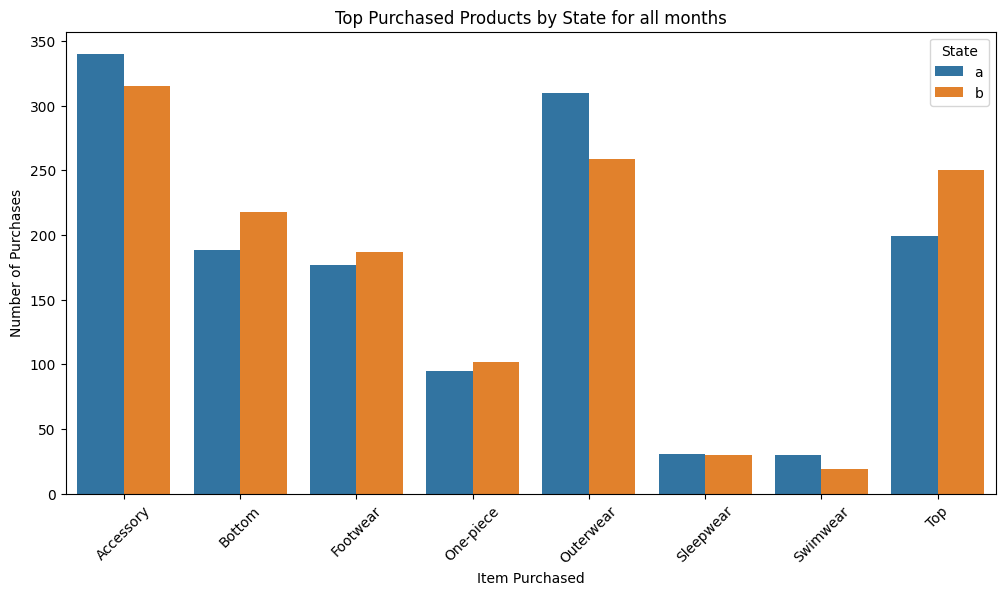

In [ ]:
# 2. Top Purchased Products by State
top_purchased_products = df.groupby(['state', 'Item Purchased']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(x='Item Purchased', y='Count', hue='state', data=top_purchased_products)
plt.title('Top Purchased Products by State for all months')
plt.xlabel('Item Purchased')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.show()

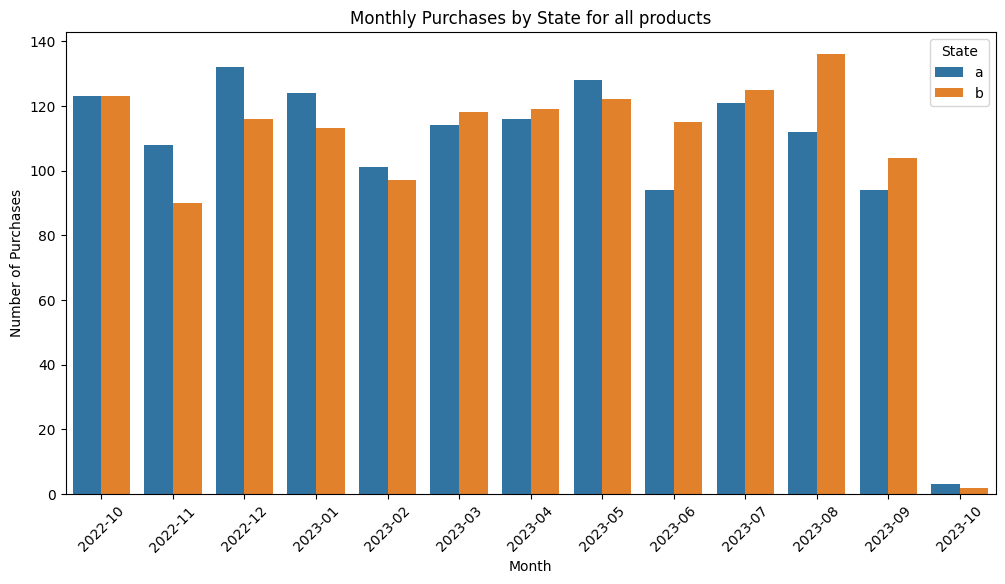

In [ ]:
# 1. Monthly Purchases by State
df['Month'] = df['Date Purchase'].dt.to_period('M')
monthly_purchases = df.groupby(['Month', 'state']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Count', hue='state', data=monthly_purchases)
plt.title('Monthly Purchases by State for all products')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.show()

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>DATE PURCHASE</i>
</div>

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>Purchase Amount (USD)	 </i>
</div>

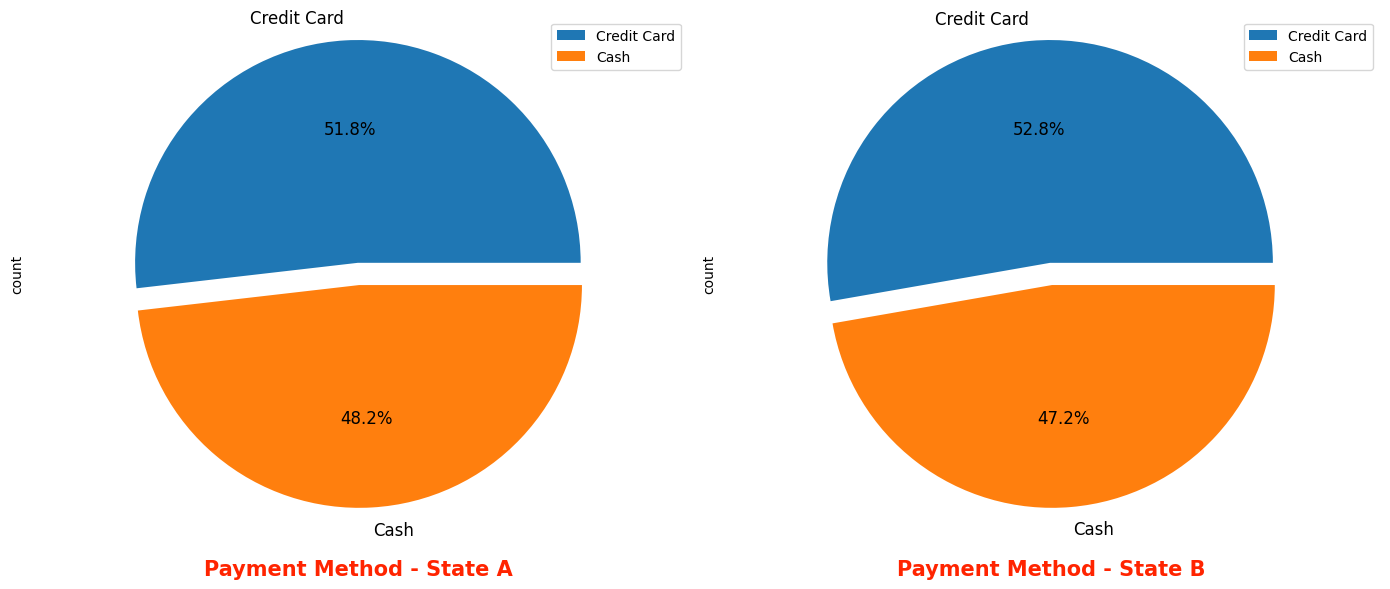

In [ ]:
# Separate data by state
df_a = df[df['state'] == 'a']
df_b = df[df['state'] == 'b']

# Plotting side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting for State A
counts_a = df_a["Payment Method"].value_counts()
explode = (0, 0.1)  # Explode the 2nd slice (Cash)
colors = ['#1f77b4', '#ff7f0e']  # Blue and orange colors

counts_a.plot(kind='pie', fontsize=12, colors=colors, explode=explode, autopct='%1.1f%%', ax=axes[0])
axes[0].set_xlabel('Payment Method - State A', weight="bold", color="#ff2400", fontsize=15, labelpad=20)
axes[0].axis('equal')
axes[0].legend(labels=counts_a.index, loc="best")

# Plotting for State B
counts_b = df_b["Payment Method"].value_counts()

counts_b.plot(kind='pie', fontsize=12, colors=colors, explode=explode, autopct='%1.1f%%', ax=axes[1])
axes[1].set_xlabel('Payment Method - State B', weight="bold", color="#ff2400", fontsize=15, labelpad=20)
axes[1].axis('equal')
axes[1].legend(labels=counts_b.index, loc="best")

plt.tight_layout()
plt.show()

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:230%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400;
            text-align: center;"><u><b>Use Cases & Strategy Reporting</b></u>
</div>

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>Customers Segments & Satisfaction Levels</i>
</div>

In [ ]:
# Define the customer segments based on satisfaction levels
df['Satisfaction_Score'] = pd.cut(df['Review Rating'], bins=[0, 2.49, 3.99, 5], labels=['Dissatisfied', 'Neutral', 'Satisfied'])

# Analyze the characteristics of each segment for each state
segment_analysis_a = df[df['state'] == 'a'].groupby('Satisfaction_Score')['Item Purchased'].count().reset_index()
segment_analysis_b = df[df['state'] == 'b'].groupby('Satisfaction_Score')['Item Purchased'].count().reset_index()

# Create Plotly tables for each state
figure_a = go.Figure(data=[go.Table(
    header=dict(values=['Satisfaction Score', 'Count of Items Purchased'],
                fill_color='lightgrey',
                align='left'),
    cells=dict(values=[segment_analysis_a['Satisfaction_Score'],
                       segment_analysis_a['Item Purchased']],
               fill_color='white',
               align='left'))
])

figure_b = go.Figure(data=[go.Table(
    header=dict(values=['Satisfaction Score', 'Count of Items Purchased'],
                fill_color='lightgrey',
                align='left'),
    cells=dict(values=[segment_analysis_b['Satisfaction_Score'],
                       segment_analysis_b['Item Purchased']],
               fill_color='white',
               align='left'))
])

# Add title and adjust layout for each table
figure_a.update_layout(title='Customer Segment Analysis (State A)',
                    title_x=0.5,
                    autosize=False)

figure_b.update_layout(title='Customer Segment Analysis (State B)',
                    title_x=0.5,
                    autosize=False)

# Display the tables
figure_a.show()

In [ ]:
figure_b.show()

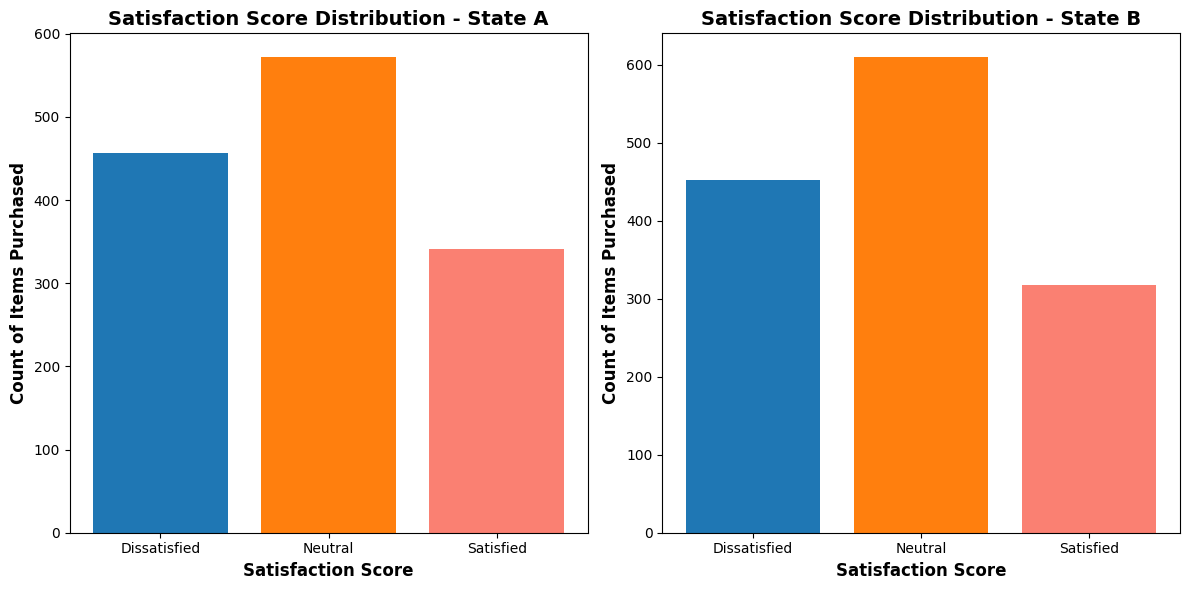

In [ ]:
# Function to plot side-by-side bar graphs with different colors
def plot_side_by_side_bars(df1, df2, label1, label2):
    plt.figure(figsize=(12, 6))

    # Define colors for bars
    colors_a = ['#1f77b4', '#ff7f0e', 'salmon']
    colors_b = ['#1f77b4', '#ff7f0e', 'salmon']

    # Plot for State A
    plt.subplot(1, 2, 1)
    plt.bar(df1['Satisfaction_Score'], df1['Item Purchased'], color=colors_a)
    plt.xlabel('Satisfaction Score', weight='bold', fontsize=12)
    plt.ylabel('Count of Items Purchased', weight='bold', fontsize=12)
    plt.title(f'Satisfaction Score Distribution - {label1}', weight='bold', fontsize=14)
    # plt.xticks(rotation=45)

    # Plot for State B
    plt.subplot(1, 2, 2)
    plt.bar(df2['Satisfaction_Score'], df2['Item Purchased'], color=colors_b)
    plt.xlabel('Satisfaction Score', weight='bold', fontsize=12)
    plt.ylabel('Count of Items Purchased', weight='bold', fontsize=12)
    plt.title(f'Satisfaction Score Distribution - {label2}', weight='bold', fontsize=14)
    # plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Plot side-by-side bars for States A and B
plot_side_by_side_bars(segment_analysis_a, segment_analysis_b, 'State A', 'State B')

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>Business Insights  </i>
</div>

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>Top 10 Customers</i>
</div>

In [ ]:
# Calculate total purchase amount for each customer in each state
customer_totals_a = df[df['state'] == 'a'].groupby('Customer Reference ID')['Purchase Amount (USD)'].sum().reset_index()
customer_totals_b = df[df['state'] == 'b'].groupby('Customer Reference ID')['Purchase Amount (USD)'].sum().reset_index()

# Sort the customers by their total purchase amount in descending order and get the top 10 for each state
top_10_customers_a = customer_totals_a.nlargest(10, 'Purchase Amount (USD)')
top_10_customers_b = customer_totals_b.nlargest(10, 'Purchase Amount (USD)')

# Create Plotly figures with tables for each state
fig_a = go.Figure(data=[go.Table(
    header=dict(values=['Customer Reference ID (State A)', 'Purchase Amount (USD)'],
                fill_color='turquoise',
                align='left'),
    cells=dict(values=[top_10_customers_a['Customer Reference ID'], top_10_customers_a['Purchase Amount (USD)']],
               fill_color='lavender',
               align='left'))
])

fig_b = go.Figure(data=[go.Table(
    header=dict(values=['Customer Reference ID (State B)', 'Purchase Amount (USD)'],
                fill_color='turquoise',
                align='left'),
    cells=dict(values=[top_10_customers_b['Customer Reference ID'], top_10_customers_b['Purchase Amount (USD)']],
               fill_color='lavender',
               align='left'))
])

# Update the layout of the tables
fig_a.update_layout(title='Top 10 Customers by Purchase Amount (State A)')
fig_b.update_layout(title='Top 10 Customers by Purchase Amount (State B)')

# Display the tables
fig_a.show()

In [ ]:
fig_b.show()

<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400"><i>Total Profit:   2022 Vs 2023</i>
</div>

In [ ]:
# Filter the dataset for the year 2022 and 2023 for each state
df_2022_a = df[(df['Date Purchase'].dt.year == 2022) & (df['state'] == 'a')]
df_2023_a = df[(df['Date Purchase'].dt.year == 2023) & (df['state'] == 'a')]

df_2022_b = df[(df['Date Purchase'].dt.year == 2022) & (df['state'] == 'b')]
df_2023_b = df[(df['Date Purchase'].dt.year == 2023) & (df['state'] == 'b')]

# Calculate the total profit for 2022 and 2023 for each state
total_profit_2022_a = df_2022_a['Purchase Amount (USD)'].sum()
total_profit_2023_a = df_2023_a['Purchase Amount (USD)'].sum()

total_profit_2022_b = df_2022_b['Purchase Amount (USD)'].sum()
total_profit_2023_b = df_2023_b['Purchase Amount (USD)'].sum()

# Create the data for the table
header = ['State', 'Year', 'Total Profit']
data = [
    ['State A', '2022', total_profit_2022_a],
    ['State A', '2023', total_profit_2023_a],
    ['State B', '2022', total_profit_2022_b],
    ['State B', '2023', total_profit_2023_b]
]

# Create a plotly table
table = go.Table(
    header=dict(values=header, fill=dict(color='black'), font=dict(color='white')),
    cells=dict(values=list(zip(*data)), fill=dict(color='grey'), font=dict(color='white'))
)

# Create a layout for the table
layout = dict(title='Total Profit comparison for 2022 and 2023 by State',
              width=600,
              height=350,
              paper_bgcolor='black',
              font=dict(color='white')
)

# Create a figure and add the table
fig = go.Figure(data=[table], layout=layout)

# Display the figure
fig.show()

In [ ]:
# Create data for the bar chart
states = ['State A', 'State A', 'State B', 'State B']
years = ['2022', '2023', '2022', '2023']
total_profits = [total_profit_2022_a, total_profit_2023_a, total_profit_2022_b, total_profit_2023_b]

# Create a Plotly bar chart
fig = go.Figure(data=[
    go.Bar(name='2022', x=['State A', 'State B'], y=[total_profit_2022_a, total_profit_2022_b]),
    go.Bar(name='2023', x=['State A', 'State B'], y=[total_profit_2023_a, total_profit_2023_b])
])

# Update layout
fig.update_layout(
    title='Total Profit comparison for 2022 and 2023 by State',
    xaxis_title='State',
    yaxis_title='Total Profit (USD)',
    barmode='group',
    width=600,
    height=400,
    paper_bgcolor='white'
)

# Show the figure
fig.show()

In [ ]:
# Function to get top 5 items for each state and month
def get_top_items_by_month(state_data):
    state_data['Month'] = pd.to_datetime(state_data['Date Purchase']).dt.to_period('M')
    grouped = state_data.groupby(['Month', 'Item Purchased']).size().reset_index(name='Count')
    top_items = grouped.sort_values(['Month', 'Count'], ascending=[True, False]).groupby('Month').head(5)
    return top_items

# Separate data by state
state_a_data = df[df['state'] == 'a']
state_b_data = df[df['state'] == 'b']

# Get top items for each state
top_items_a = get_top_items_by_month(state_a_data)
top_items_b = get_top_items_by_month(state_b_data)

# Function to format top items for display with dynamic background colors for months
def format_top_items(top_items, state_name):
    formatted_output = f"<div class='state-section'>" \
                       f"<div class='state-header'>Top Items Purchased for State {state_name.upper()}</div>" \
                       f"<div class='item-list'>" \
                       f"<table>" \
                       f"<thead>" \
                       f"<tr>" \
                       f"<th>Month</th>" \
                       f"<th>Item Purchased</th>" \
                       f"<th>Count</th>" \
                       f"</tr>" \
                       f"</thead>" \
                       f"<tbody>"

    # Define colors for months (example colors, replace with your desired colors)
    month_colors = {
        '2022-10': '#007bff',  # Blue
        '2022-11': '#6f42c1',  # Purple
        '2022-12': '#28a745',  # Green
        '2023-01': '#dc3545',  # Red
        '2023-02': '#fd7e14',  # Orange
        '2023-03': '#6610f2',  # Indigo
        '2023-04': '#17a2b8',  # Cyan
        '2023-05': '#ffc107',  # Yellow
        '2023-06': '#e83e8c',  # Pink
        '2023-07': '#20c997',  # Teal
        '2023-08': '#6c757d',  # Gray
        '2023-09': '#343a40'   # Dark Gray
    }

    for index, row in top_items.iterrows():
        month_color = month_colors.get(str(row['Month']), '#343a40')  # Default to dark gray if month not in dictionary
        formatted_output += f"<tr style='background-color: {month_color};'>" \
                            f"<td>{row['Month']}</td>" \
                            f"<td>{row['Item Purchased']}</td>" \
                            f"<td>{row['Count']}</td>" \
                            f"</tr>"

    formatted_output += f"</tbody>" \
                       f"</table>" \
                       f"</div>" \
                       f"</div>"

    return formatted_output

# Generate formatted HTML output for State A and State B
html_output = "<!DOCTYPE html><html lang='en'><head>" \
              "<meta charset='UTF-8'><meta name='viewport' content='width=device-width, initial-scale=1.0'>" \
              "<title>Top Items Purchased by Month and State</title>" \
              "<style>" \
              "body { font-family: Arial, sans-serif; background-color: #f0f0f0; padding: 20px; }" \
              ".state-section { margin-bottom: 30px; }" \
              ".state-header { background-color: #343a40; color: white; padding: 10px; margin-bottom: 10px; }" \
              ".item-list { background-color: #454d55; border: 1px solid #343a40; border-radius: 5px; padding: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); }" \
              ".item-list table { width: 100%; border-collapse: collapse; margin-top: 10px; }" \
              ".item-list th, .item-list td { border: 1px solid #343a40; padding: 8px; text-align: left; color: white; }" \
              ".item-list th { background-color: #343a40; }" \
              "</style>" \
              "</head><body>"

html_output += format_top_items(top_items_a, 'a')
html_output += format_top_items(top_items_b, 'b')

html_output += "</body></html>"

# Display the HTML output
from IPython.display import display, HTML
display(HTML(html_output))

Month,Item Purchased,Count
2022-10,Outerwear,28
2022-10,Accessory,23
2022-10,Footwear,23
2022-10,Top,16
2022-10,Bottom,15
2022-11,Accessory,27
2022-11,Top,18
2022-11,Bottom,17
2022-11,Footwear,17
2022-11,Outerwear,13


In [ ]:
# Create grouped bar charts for each state
fig_a = go.Figure()
fig_b = go.Figure()

# Add traces for State A
for i, item in enumerate(top_items_a['Item Purchased'].unique()):
    fig_a.add_trace(go.Bar(
        x=top_items_a[top_items_a['Item Purchased'] == item]['Month'].astype(str),  # Convert Period to string
        y=top_items_a[top_items_a['Item Purchased'] == item]['Count'],
        name=f'Item: {item} (State A)',
        #marker_color=colors_a[i % len(colors_a)],  # Use modulo to cycle through colors
        legendgroup='group_a'
    ))

# Add traces for State B
for i, item in enumerate(top_items_b['Item Purchased'].unique()):
    fig_b.add_trace(go.Bar(
        x=top_items_b[top_items_b['Item Purchased'] == item]['Month'].astype(str),  # Convert Period to string
        y=top_items_b[top_items_b['Item Purchased'] == item]['Count'],
        name=f'Item: {item} (State B)',
        #marker_color=colors_b[i % len(colors_b)],  # Use modulo to cycle through colors
        legendgroup='group_b'
    ))

# Update layout for State A
fig_a.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Top 5 Items Purchased by Month (State A)',
    xaxis_title='Month',
    yaxis_title='Count',
    legend_title='Items',
    width=1200,  # Increase width for better visibility
    height=800,  # Increase height for better visibility
    xaxis=dict(
        tickmode='array',
        tickvals=top_items_a['Month'].astype(str).tolist(),  # Set tick values to all months
        ticktext=top_items_a['Month'].astype(str).tolist()   # Set tick labels to all months
    )
)

# Update layout for State B
fig_b.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Top 5 Items Purchased by Month (State B)',
    xaxis_title='Month',
    yaxis_title='Count',
    legend_title='Items',
    width=1200,  # Increase width for better visibility
    height=800,  # Increase height for better visibility
    xaxis=dict(
        tickmode='array',
        tickvals=top_items_b['Month'].astype(str).tolist(),  # Set tick values to all months
        ticktext=top_items_b['Month'].astype(str).tolist()   # Set tick labels to all months
    )
)


# Show the figures
fig_a.show()
fig_b.show()

In [ ]:
# Get the unique months
unique_months = df['Month'].unique()
print(unique_months)

<PeriodArray>
['2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04',
 '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10']
Length: 13, dtype: period[M]


In [ ]:
# Function to get top 5 items for each state and month
def get_top_items_by_month(state_data):
    state_data['Month'] = state_data['Date Purchase'].dt.to_period('M')
    grouped = state_data.groupby(['Month', 'Item Purchased']).size().reset_index(name='Count')
    top_items = grouped.sort_values(['Month', 'Count'], ascending=[True, False]).groupby('Month').head(5)
    return top_items

# Separate data by state
state_a_data = df[df['state'] == 'a']
state_b_data = df[df['state'] == 'b']

# Get top items for each state
top_items_a = get_top_items_by_month(state_a_data)
top_items_b = get_top_items_by_month(state_b_data)

# Get the unique months across both states
unique_months = pd.concat([top_items_a['Month'], top_items_b['Month']]).sort_values().unique()

# Ensure all months are included in the pivot tables
top_items_a_pivot = top_items_a.pivot_table(index='Month', columns='Item Purchased', values='Count', fill_value=0)
top_items_a_pivot = top_items_a_pivot.reindex(unique_months, fill_value=0)

top_items_b_pivot = top_items_b.pivot_table(index='Month', columns='Item Purchased', values='Count', fill_value=0)
top_items_b_pivot = top_items_b_pivot.reindex(unique_months, fill_value=0)

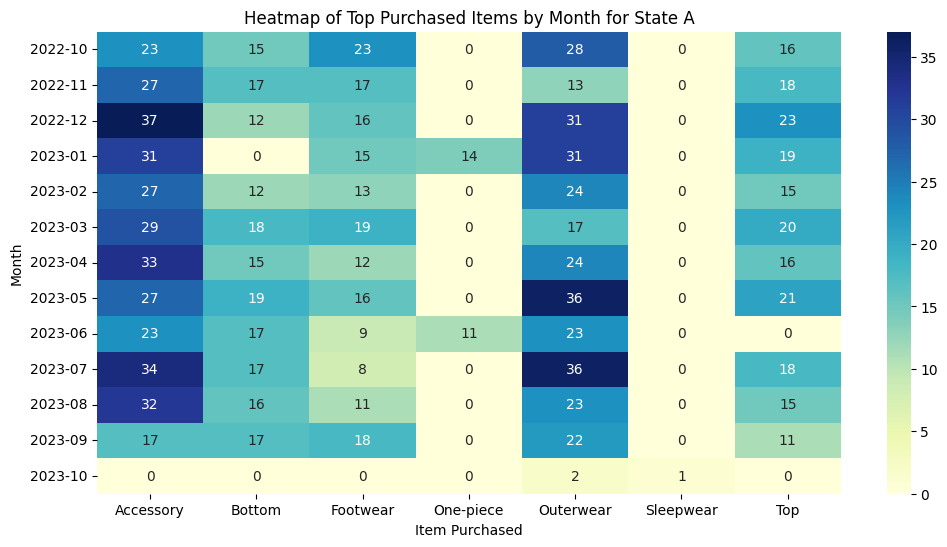

In [ ]:
# Plot the heatmaps
plt.figure(figsize=(12, 6))
sns.heatmap(top_items_a_pivot, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Top Purchased Items by Month for State A')
plt.xlabel('Item Purchased')
plt.ylabel('Month')
plt.show()

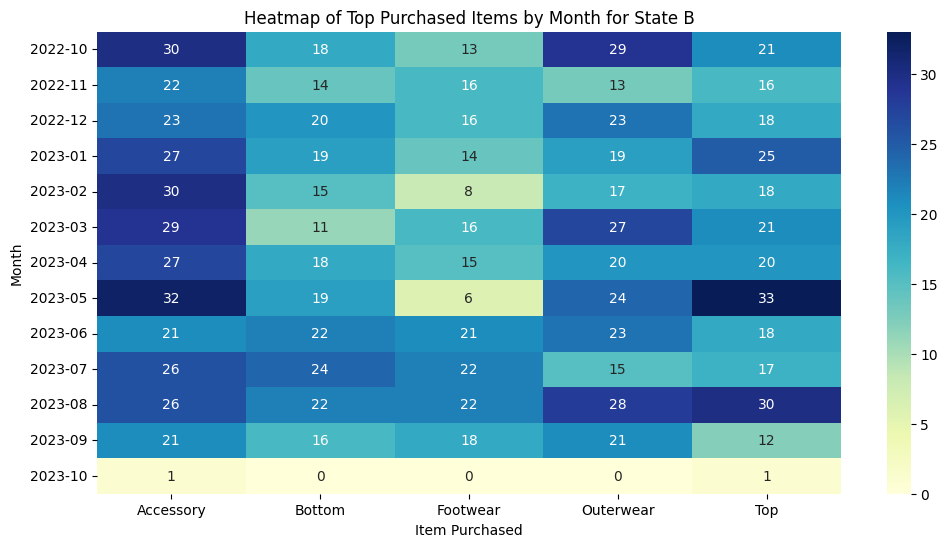

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(top_items_b_pivot, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Top Purchased Items by Month for State B')
plt.xlabel('Item Purchased')
plt.ylabel('Month')
plt.show()

In [ ]:
# Function to get top 5 items for each state and month
def get_top_items_by_month(state_data):
    state_data['Month'] = state_data['Date Purchase'].dt.to_period('M')
    grouped = state_data.groupby(['Month', 'Item Purchased']).size().reset_index(name='Count')
    top_items = grouped.sort_values(['Month', 'Count'], ascending=[True, False]).groupby('Month').head(5)
    return top_items

# Function to find similar products (assuming similarity by category)
def find_similar_products(item):
    # Dummy implementation: Recommend products of the same category
    similar_items = df[df['Item Purchased'] == item]['Item Purchased'].unique()
    return similar_items

# Separate data by state
state_a_data = df[df['state'] == 'a']
state_b_data = df[df['state'] == 'b']

# Get top items for each state
top_items_a = get_top_items_by_month(state_a_data)
top_items_b = get_top_items_by_month(state_b_data)

# Generate recommendations for state A
recommendations_a = {}
for month in top_items_a['Month'].unique():
    recommendations_a[month] = []
    for item in top_items_a[top_items_a['Month'] == month]['Item Purchased']:
        similar_items = find_similar_products(item)
        recommendations_a[month].append((item, similar_items))

# Generate recommendations for state B
recommendations_b = {}
for month in top_items_b['Month'].unique():
    recommendations_b[month] = []
    for item in top_items_b[top_items_b['Month'] == month]['Item Purchased']:
        similar_items = find_similar_products(item)
        recommendations_b[month].append((item, similar_items))

# Function to format recommendations in HTML table format with dark color scheme
def format_recommendations_html(recommendations, state_name):
    formatted_output = f"<div class='state-section'>" \
                       f"<div class='state-header'>Recommendations for State {state_name.upper()}</div>"

    for month, items_list in recommendations.items():
        formatted_output += f"<div class='recommendation-block'>" \
                            f"<div class='month'>Month: {month}</div>" \
                            f"<table class='recommendation-table'>" \
                            f"<tr><th style='color: #5cb85c;'>Top Purchased Item</th><th style='color: #5cb85c;'>Recommended Items</th></tr>"

        for item, similar_items in items_list:
            recommended_items = ", ".join(similar_items)
            formatted_output += f"<tr><td>{item}</td><td>{recommended_items}</td></tr>"

        formatted_output += "</table></div>"

    formatted_output += "</div>"

    return formatted_output

# Generate HTML output with dark color scheme in tabular format
html_output = "<!DOCTYPE html><html lang='en'><head>" \
              "<meta charset='UTF-8'><meta name='viewport' content='width=device-width, initial-scale=1.0'>" \
              "<title>Recommendations for Top Purchased Items by State</title>" \
              "<style>" \
              "body { font-family: Arial, sans-serif; background-color: #333; color: #ddd; padding: 20px; }" \
              ".state-section { margin-bottom: 30px; background-color: #444; border: 1px solid #666; border-radius: 5px; padding: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.5); }" \
              ".state-header { background-color: #222; color: #fff; padding: 10px; font-weight: bold; margin-bottom: 10px; border-top-left-radius: 5px; border-top-right-radius: 5px; }" \
              ".recommendation-block { margin-bottom: 20px; padding: 10px; border-top: 1px solid #666; }" \
              ".month { font-size: 14px; font-weight: bold; color: #66afe9; }" \
              ".recommendation-table { width: 100%; border-collapse: collapse; }" \
              ".recommendation-table th { padding: 8px; border: 1px solid #666; text-align: left; }" \
              ".recommendation-table td { padding: 8px; border: 1px solid #666; text-align: left; }" \
              "</style>" \
              "</head><body>"

html_output += format_recommendations_html(recommendations_a, 'a')
html_output += format_recommendations_html(recommendations_b, 'b')

html_output += "</body></html>"

# Display the HTML output
display(HTML(html_output))

Top Purchased Item,Recommended Items
Outerwear,Outerwear
Accessory,Accessory
Footwear,Footwear
Top,Top
Bottom,Bottom
Top Purchased Item,Recommended Items
Accessory,Accessory
Top,Top
Bottom,Bottom
Footwear,Footwear


<div style="padding:10px;
            color:#ff2400;
            background-color:#1f262a;
            margin:50px;
            font-size:230%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #a9aba9;
            overflow:hidden;
            font-weight:400;
            text-align: center;"><u><b>THE END</b></u>
</div>